**    Based on the given attributes predict the flower class. **
    **Lets start with importing data and checking the first few rows of the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

plt.style.use('seaborn-colorblind')

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv('../input/iris-dataset/iris.csv', header= None, names=col_names)
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
dataset['species_num'] = [iris_class[i] for i in dataset.species]
X = dataset.drop(['species', 'species_num'], axis=1)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


    Visualizations will help in understanding our data in more better way. Following are the few visualiazations like :
*  Histogram
*  Line chart
*  Kernel Density Chart
*  Box plot

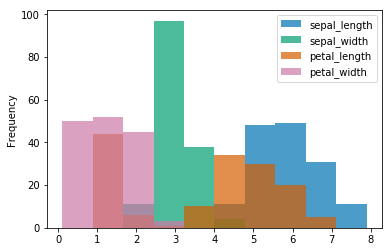

In [2]:
dataset[['sepal_length','sepal_width','petal_length', 'petal_width']].plot.hist(alpha=0.7);

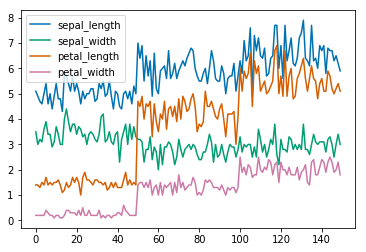

In [3]:
dataset[['sepal_length','sepal_width','petal_length', 'petal_width']].plot();

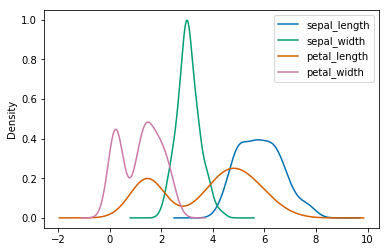

In [4]:
dataset[['sepal_length','sepal_width','petal_length', 'petal_width']].plot.kde();

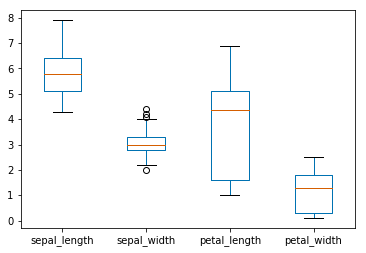

In [5]:
dataset[['sepal_length','sepal_width','petal_length', 'petal_width']].plot.box();

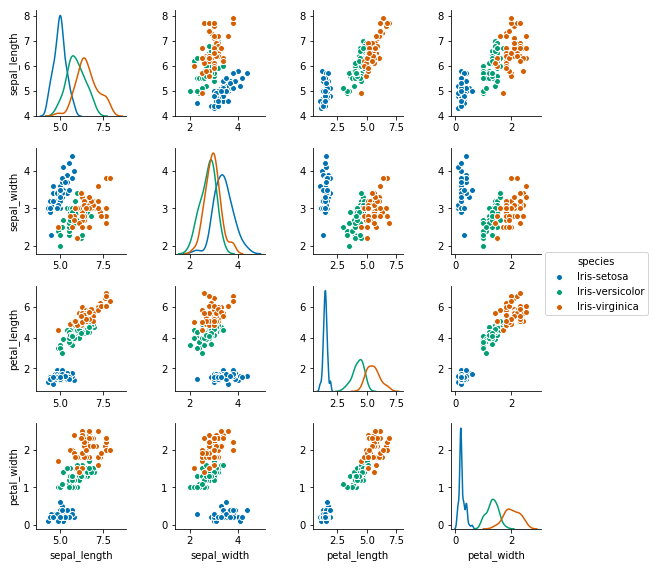

In [6]:
sns.pairplot(dataset[['sepal_length','sepal_width','petal_length', 'petal_width','species']], hue='species', diag_kind='kde', size=2);

In [7]:
## Create an 'X' matrix by dropping the irrelevant columns.
X = dataset.drop(['species', 'species_num'], axis=1)
y = dataset.species_num
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
## Import the Classifier.

## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print ("The accuracy of the model - ", format(accuracy_score(y_test, pred) * 100))

The accuracy of the model -  100.0


Lets implement K-NN for Regression also.  We will make a sample regression dataset using sklearn.
1.  We will generate 100 test samples for regression

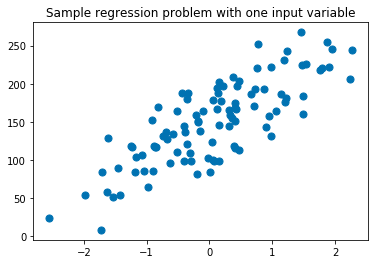

In [8]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

     Lets implement the k-NN for regression problem using the above sample regression dataset

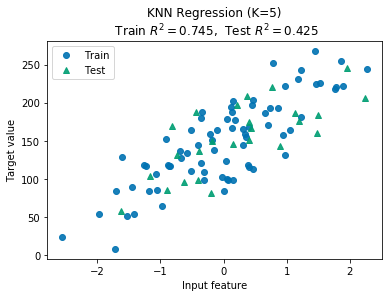

In [9]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)
train_score = knnreg.score(X_train, y_train)
test_score = knnreg.score(X_test, y_test)
plt.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
plt.plot(X_test, y_test, '^', alpha=0.9, label='Test')
plt.xlabel('Input feature')
plt.ylabel('Target value')
plt.title('KNN Regression (K={})\n Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'.format(5, train_score, test_score))
plt.legend()
fig = plt.figure(figsize=(18, 18))

plt.show()
#print(knnreg.predict(X_test))
#print('R-squared test score: {:.3f}'.format(knnreg.score(X_test, y_test)))